In [49]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [50]:
import warnings
warnings.filterwarnings('ignore')

In [51]:
data = pd.read_csv("House_Rent_Dataset.csv")

In [52]:
data.head(5)

,Posted On,BHK,Rent,Size,Floor,Area Type,Area Locality,City,Furnishing Status,Tenant Preferred,Bathroom,Point of Contact
0,2022-05-18,2,10000,1100,Ground out of 2,Super Area,Bandel,Kolkata,Unfurnished,Bachelors/Family,2,Contact Owner
1,2022-05-13,2,20000,800,1 out of 3,Super Area,"Phool Bagan, Kankurgachi",Kolkata,Semi-Furnished,Bachelors/Family,1,Contact Owner
2,2022-05-16,2,17000,1000,1 out of 3,Super Area,Salt Lake City Sector 2,Kolkata,Semi-Furnished,Bachelors/Family,1,Contact Owner
3,2022-07-04,2,10000,800,1 out of 2,Super Area,Dumdum Park,Kolkata,Unfurnished,Bachelors/Family,1,Contact Owner
4,2022-05-09,2,7500,850,1 out of 2,Carpet Area,South Dum Dum,Kolkata,Unfurnished,Bachelors,1,Contact Owner


## Data Visualization

In [53]:
# plt.bar(data['BHK'].value_counts().index, data['BHK'].value_counts().values)

In [54]:
# plt.bar(data['Size'].value_counts().index, data['Size'].value_counts().values)

In [55]:
# plt.bar(data['Area Type'].value_counts().index, data['Area Type'].value_counts().values)

In [56]:
# plt.bar(data['Area Locality'].value_counts().index, data['Area Locality'].value_counts().values)

In [57]:
# plt.bar(data['Furnishing Status'].value_counts().index, data['Furnishing Status'].value_counts().values)

In [58]:
# plt.bar(data['Bathroom'].value_counts().index, data['Bathroom'].value_counts().values)

## Preprocessing

### Conversion of Categorical Variable to One-Hot Encoding

In [59]:
data['Price_per_sqft'] = data['Rent'] / data['Size']

In [60]:
data = data[['BHK', 'Size', 'Price_per_sqft', 'Area Type', 'City', 'Furnishing Status', 'Bathroom', 'Rent']]

In [61]:
data.head(5)

,BHK,Size,Price_per_sqft,Area Type,City,Furnishing Status,Bathroom,Rent
0,2,1100,9.090909,Super Area,Kolkata,Unfurnished,2,10000
1,2,800,25.000000,Super Area,Kolkata,Semi-Furnished,1,20000
2,2,1000,17.000000,Super Area,Kolkata,Semi-Furnished,1,17000
3,2,800,12.500000,Super Area,Kolkata,Unfurnished,1,10000
4,2,850,8.823529,Carpet Area,Kolkata,Unfurnished,1,7500


In [62]:
def one_hot_encode(data, column):
    encoded = pd.get_dummies(data[column], drop_first= True)
    data = data.drop(column, axis = 1)
    data = data.join(encoded)
    return data

In [63]:
data = one_hot_encode(data, 'Area Type')
data = one_hot_encode(data, 'City')
data = one_hot_encode(data, 'Furnishing Status')

In [64]:
data.head(5)

,BHK,Size,Price_per_sqft,Bathroom,Rent,Carpet Area,Super Area,Chennai,Delhi,Hyderabad,Kolkata,Mumbai,Semi-Furnished,Unfurnished
0,2,1100,9.090909,2,10000,False,True,False,False,False,True,False,False,True
1,2,800,25.000000,1,20000,False,True,False,False,False,True,False,True,False
2,2,1000,17.000000,1,17000,False,True,False,False,False,True,False,True,False
3,2,800,12.500000,1,10000,False,True,False,False,False,True,False,False,True
4,2,850,8.823529,1,7500,True,False,False,False,False,True,False,False,True


### Cleaning Outliers for Integer Data Type

In [65]:
columns_to_check = ['BHK', 'Size', 'Bathroom', 'Price_per_sqft'] 

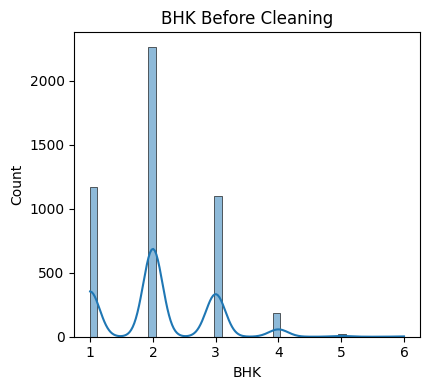

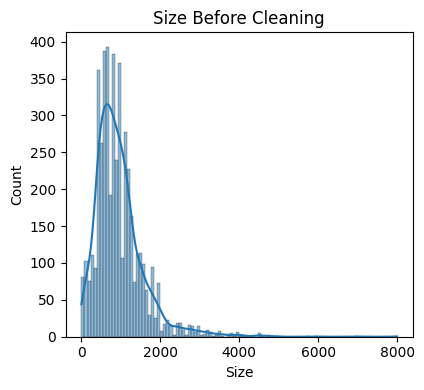

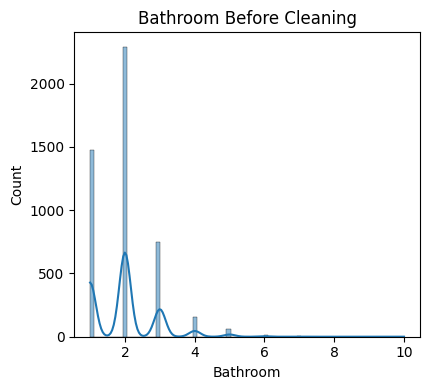

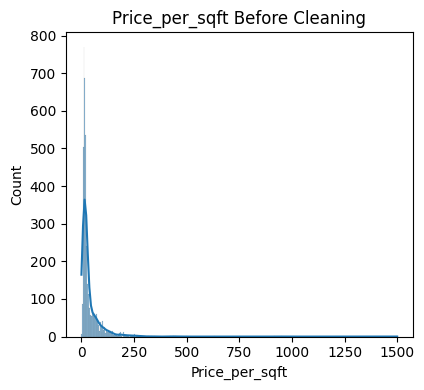

In [66]:
for column_name in columns_to_check:
    plt.figure(figsize=(8, 4))
    plt.subplot(1, 2, 1)
    sns.histplot(data[column_name], kde=True)
    plt.title(f'{column_name} Before Cleaning')

    plt.tight_layout()
    plt.show()

In [67]:

# Loop through the columns and apply the IQR-based outlier detection and removal
for column_name in columns_to_check:
    Q1 = data[column_name].quantile(0.25)
    Q3 = data[column_name].quantile(0.75)
    IQR = Q3 - Q1
    data = data[(data[column_name] >= Q1 - 1.5*IQR) & (data[column_name] <= Q3 + 1.5*IQR)]

In [68]:
data.shape

(3906, 14)

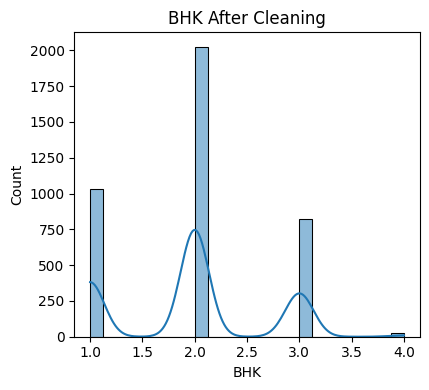

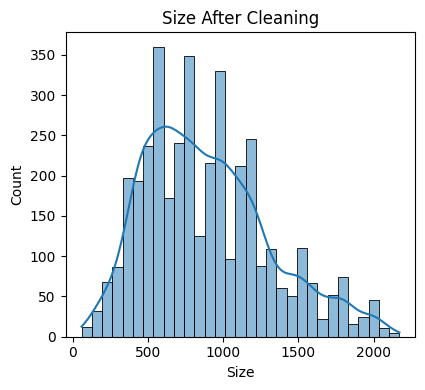

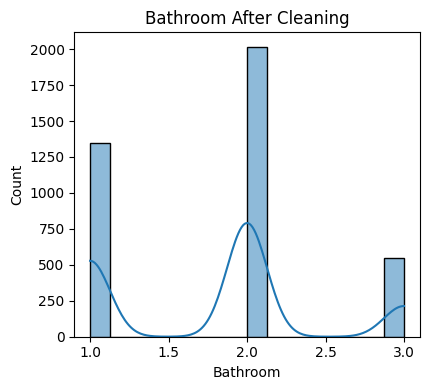

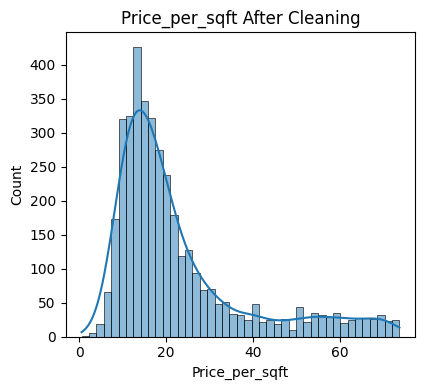

In [69]:
for column_name in columns_to_check:
    plt.figure(figsize=(8, 4))
    plt.subplot(1, 2, 1)
    sns.histplot(data[column_name], kde=True)
    plt.title(f'{column_name} After Cleaning')

    plt.tight_layout()
    plt.show()

### Training and Test Split

In [70]:
X = data.drop('Rent', axis=1)
y = data['Rent']

In [71]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size= 0.2, random_state = 42)

### Standardizing the Values

In [72]:
from sklearn.preprocessing import StandardScaler

sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

## Modelling

In [73]:
from sklearn import linear_model

model = linear_model.LinearRegression()
model.fit(X_train, y_train)
model.coef_

array([  860.97770358,  8797.80627532, 12378.81241896,   453.8231938 ,
       -3653.80096858, -3644.20595695,  -208.43481481,    49.29716073,
       -1144.22862526,   -49.92009953,  -780.52411956,  -256.1482332 ,
        -127.1761952 ])

## Evaluation

### Quantitative Evaluation

In [74]:
y_preds = model.predict(X_test)

In [75]:
from sklearn.metrics import mean_squared_error, r2_score

# The coefficients
print("Coefficients: \n", model.coef_)
# The mean squared error
print("Mean squared error: %.2f" % mean_squared_error(y_test, y_preds))
# The coefficient of determination: 1 is perfect prediction
print("Coefficient of determination: %.2f" % r2_score(y_test, y_preds))

Coefficients: 
 [  860.97770358  8797.80627532 12378.81241896   453.8231938
 -3653.80096858 -3644.20595695  -208.43481481    49.29716073
 -1144.22862526   -49.92009953  -780.52411956  -256.1482332
  -127.1761952 ]
Mean squared error: 29804658.51
Coefficient of determination: 0.87


### Qualitative Evaluation

In [76]:
sample_data = X.iloc[0]
sample_data

BHK                      2
Size                  1100
Price_per_sqft    9.090909
Bathroom                 2
Carpet Area          False
Super Area            True
Chennai              False
Delhi                False
Hyderabad            False
Kolkata               True
Mumbai               False
Semi-Furnished       False
Unfurnished           True
Name: 0, dtype: object

In [77]:
sample_data_standardized = sc.transform(X.iloc[0].values.reshape(1,-1))

In [78]:
model_rent_forecast = model.predict(sample_data_standardized)[0]
model_rent_forecast

13700.100710901275

In [79]:
y.iloc[0]

10000

## Simple Linear Regression Model

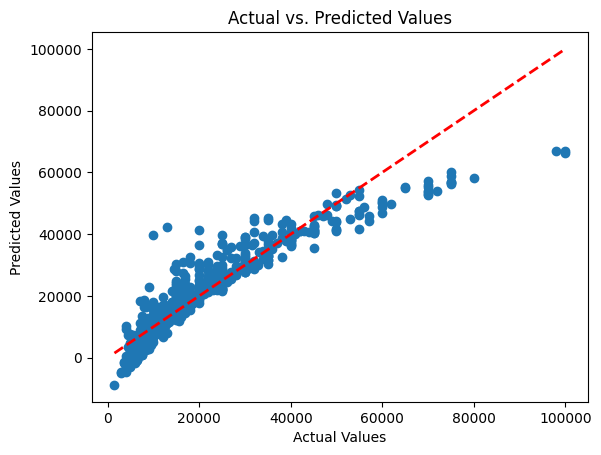

In [80]:
plt.scatter(y_test, y_preds)
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], linestyle='--', color='red', linewidth=2)
plt.xlabel("Actual Values")
plt.ylabel("Predicted Values")
plt.title("Actual vs. Predicted Values")
plt.savefig("linear_regression_plot.png")
plt.show()

In [81]:
data

,BHK,Size,Price_per_sqft,Bathroom,Rent,Carpet Area,Super Area,Chennai,Delhi,Hyderabad,Kolkata,Mumbai,Semi-Furnished,Unfurnished
0,2,1100,9.090909,2,10000,False,True,False,False,False,True,False,False,True
1,2,800,25.000000,1,20000,False,True,False,False,False,True,False,True,False
2,2,1000,17.000000,1,17000,False,True,False,False,False,True,False,True,False
3,2,800,12.500000,1,10000,False,True,False,False,False,True,False,False,True
4,2,850,8.823529,1,7500,True,False,False,False,False,True,False,False,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4741,2,1000,15.000000,2,15000,True,False,False,False,True,False,False,True,False
4742,3,2000,14.500000,3,29000,False,True,False,False,True,False,False,True,False
4743,3,1750,20.000000,3,35000,True,False,False,False,True,False,False,True,False
4744,3,1500,30.000000,2,45000,True,False,False,False,True,False,False,True,False
